# BÀI TẬP PHÂN TÍCH EDA NÂNG CAO

## Đề Bài

Sử dụng Pandas và Seaborn thực hiện phân tích EDA cho dữ liệu bán hàng (supermarket_sales_vn.csv)
- Đơn biến (phân tích trên 1 cột):
    - Số đơn: so sánh tổng đơn theo chi nhánh, nhóm hàng, giới tính khách hàng, phương thức thanh toán (cột Payment).
    - Mỗi đơn hàng có một số mặt hàng, vẽ phân bố số lượng đơn theo số mặt hàng (chẳng hạn các đơn hàng có 1, 2, 3, ... mặt hàng có số đơn là bao nhiêu?).
    - Thời gian: ngày nào bận rộn nhất tuần? thời điểm nào bận rộn nhất trong ngày?
- Đa biến (cần kết hợp 2 hay nhiều cột):
    - Doanh thu: tỷ lệ tổng doanh thu theo chi nhánh, nhóm hàng, giới tính khách hàng.
    - Thuế: tương tự doanh thu.
    - Rating: so sánh rating giữa các nhóm hàng, giữa các ngày trong tuần, giới tính.
    - Xem xét mối tương quan giữa các biến dạng số.

## Script

### Using

In [46]:
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Contract Fields

In [47]:
# Column name
CN_INV_ID = 'Invoice ID'
CN_CITY = 'City'
CN_CUST_TYPE = 'Customer type'
CN_GN = 'Gender'
CN_PROD_LINE = 'Product line'
CN_UNIT_PR = 'Unit price'
CN_QTY = 'Quantity'
CN_TAX = 'Tax 5%'
CN_TOT = 'Total'
CN_DATE = 'Date'
CN_TIME = 'Time'
CN_PMT = 'Payment'
CN_COGS = 'cogs'
CN_RTG = 'Rating'

### Processing

In [48]:
df = pd.read_csv('supermarket_sales_vn.csv')

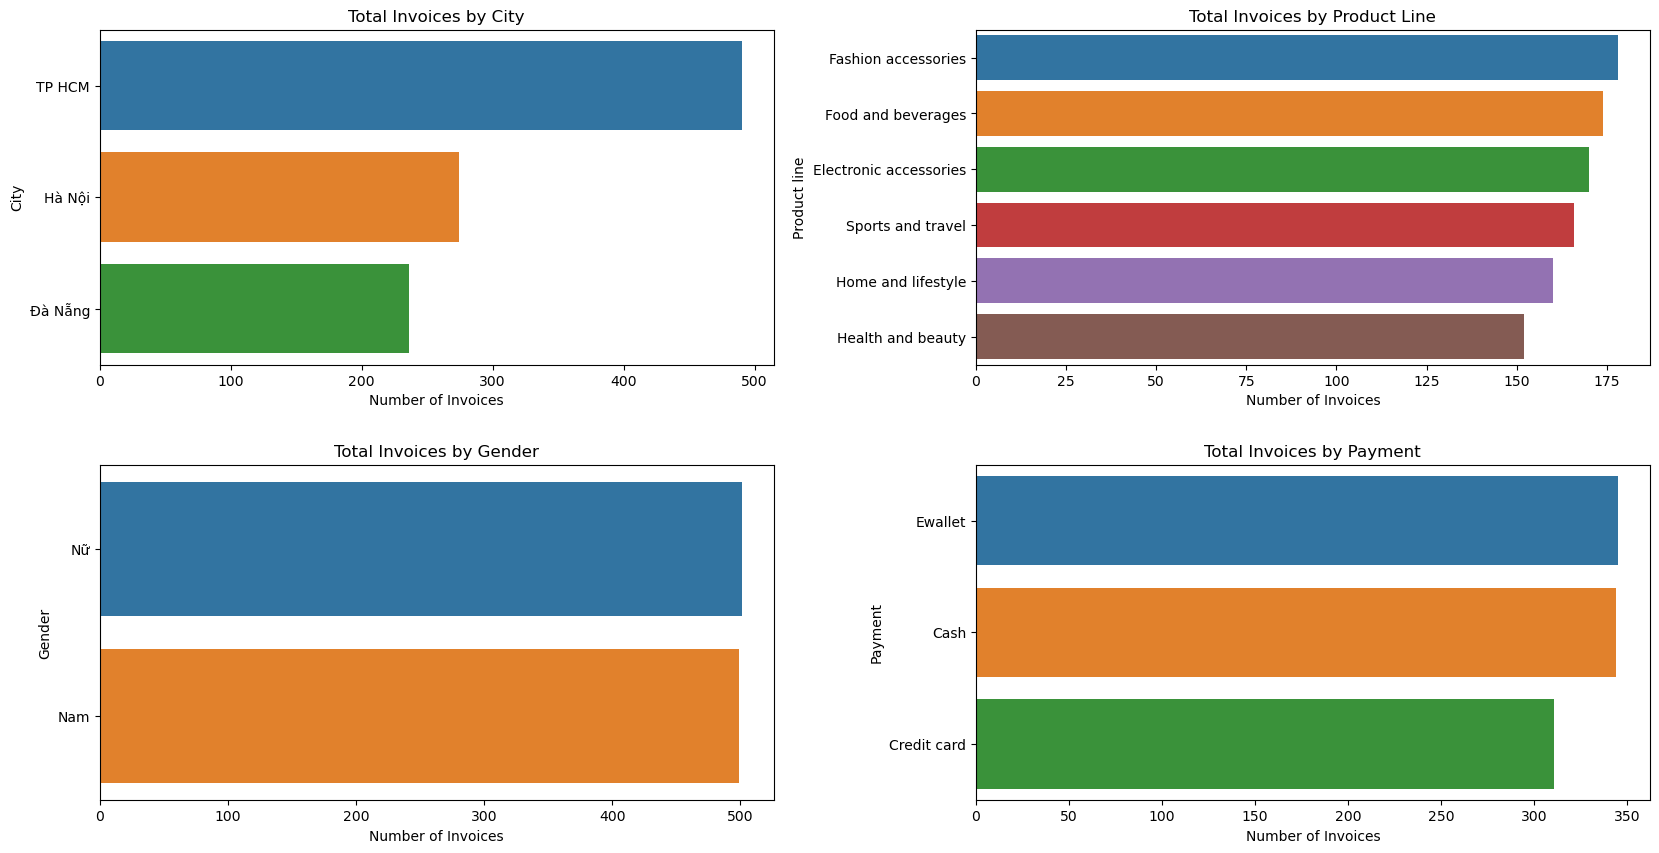

In [254]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10),  gridspec_kw={'hspace': 0.3, 'wspace': 0.3})

sns.barplot(x=CN_INV_ID, y=CN_CITY, data=df.groupby(CN_CITY)[CN_INV_ID].nunique().reset_index().sort_values(by=CN_INV_ID, ascending=False), ax=axes[0, 0])
axes[0, 0].set_xlabel('Number of Invoices')
axes[0, 0].set_title(f'Total Invoices by {CN_CITY.title()}')

sns.barplot(x=CN_INV_ID, y=CN_PROD_LINE, data=df.groupby(CN_PROD_LINE)[CN_INV_ID].nunique().reset_index().sort_values(by=CN_INV_ID, ascending=False), ax=axes[0, 1])
axes[0, 1].set_xlabel('Number of Invoices')
axes[0, 1].set_title(f'Total Invoices by {CN_PROD_LINE.title()}')

sns.barplot(x=CN_INV_ID, y=CN_GN, data=df.groupby(CN_GN)[CN_INV_ID].nunique().reset_index().sort_values(by=CN_INV_ID, ascending=False), ax=axes[1, 0])
axes[1, 0].set_xlabel('Number of Invoices')
axes[1, 0].set_title(f'Total Invoices by {CN_GN.title()}')

sns.barplot(x=CN_INV_ID, y=CN_PMT, data=df.groupby(CN_PMT)[CN_INV_ID].nunique().reset_index().sort_values(by=CN_INV_ID, ascending=False), ax=axes[1, 1])
axes[1, 1].set_xlabel('Number of Invoices')
axes[1, 1].set_title(f'Total Invoices by {CN_PMT.title()}')

plt.show()

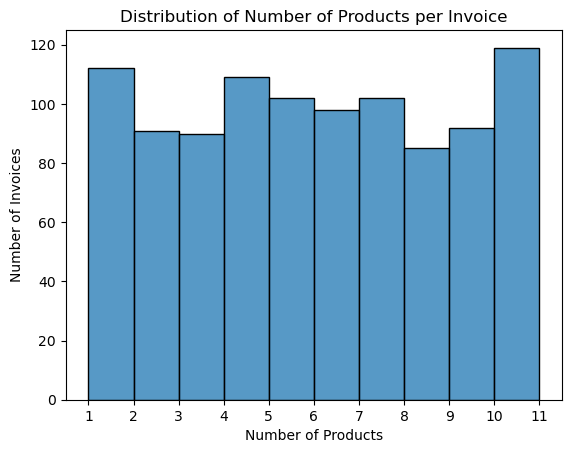

In [272]:
num_prods_per_inv = df.groupby(CN_INV_ID).apply(lambda x: x[[CN_PROD_LINE, CN_QTY]].drop_duplicates()[CN_QTY].sum())
rng = range(1, num_prods_per_inv.max() + 2)
sns.histplot(num_prods_per_inv, bins=rng)
plt.xlabel('Number of Products')
plt.ylabel('Number of Invoices')
plt.title('Distribution of Number of Products per Invoice')
plt.xticks(rng)
plt.show()

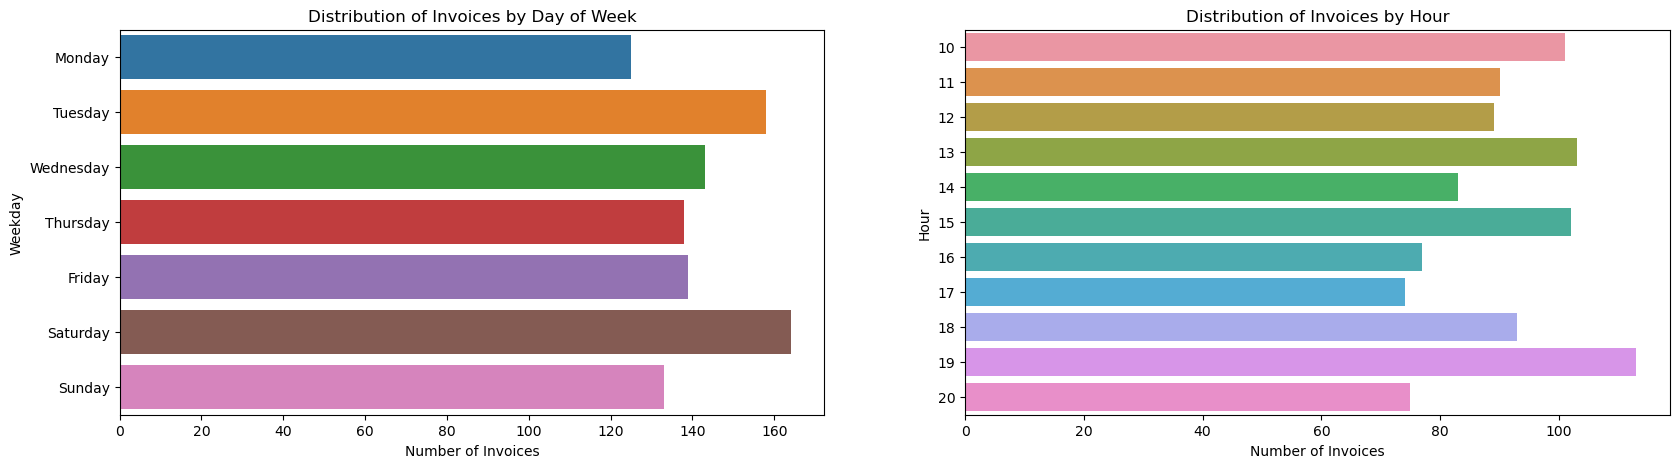

In [252]:
df['Weekday'] = pd.to_datetime(df[CN_DATE]).apply(lambda x: x.weekday())
df['Hour'] = pd.to_datetime(df[CN_TIME]).dt.hour

fig, axes = plt.subplots(ncols=2, figsize=(20, 5))

sns.barplot(x=CN_INV_ID, y='Weekday', data=df.groupby('Weekday')[CN_INV_ID].nunique().reset_index(), orient='horizontal', ax=axes[0])
axes[0].set_xlabel('Number of Invoices')
axes[0].set_ylabel('Weekday')
axes[0].set_title('Distribution of Invoices by Day of Week')
axes[0].set_yticks(range(7), [datetime.date(1900, 1, 1).strftime('%A'),
                      datetime.date(1900, 1, 2).strftime('%A'),
                      datetime.date(1900, 1, 3).strftime('%A'),
                      datetime.date(1900, 1, 4).strftime('%A'),
                      datetime.date(1900, 1, 5).strftime('%A'),
                      datetime.date(1900, 1, 6).strftime('%A'),
                      datetime.date(1900, 1, 7).strftime('%A')])

sns.barplot(x=CN_INV_ID, y='Hour', data=df.groupby('Hour')[CN_INV_ID].nunique().reset_index(), orient='horizontal', ax=axes[1])
axes[1].set_xlabel('Number of Invoices')
axes[1].set_ylabel('Hour')
axes[1].set_title('Distribution of Invoices by Hour')

plt.show()

Thứ 7 là ngày bận rộn nhất trong tuần và 19h là thời gian bận rộn nhất trong ngày.

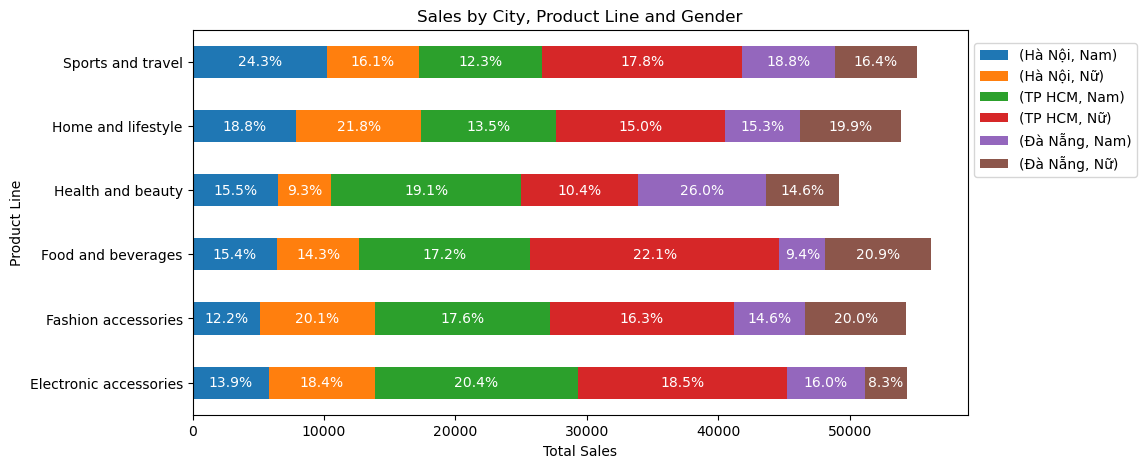

In [175]:
ax = pd.pivot_table(df.groupby([CN_CITY, CN_PROD_LINE, CN_GN], as_index=False)[CN_TOT].sum(), values=CN_TOT, index=[CN_PROD_LINE], columns=[CN_CITY, CN_GN], aggfunc='sum').plot(kind='barh', stacked=True, figsize=(10, 5))
plt.title(f'Sales by {CN_CITY.title()}, {CN_PROD_LINE.title()} and {CN_GN.title()}')
plt.xlabel('Total Sales')
plt.ylabel(CN_PROD_LINE.title())
for c in ax.containers:
    for i, child in enumerate(c.get_children()):
        w = child.get_width()
        h = child.get_height()
        ax.text(child.get_x() + w / 2, child.get_y() + h / 2, f'{w / sum(c.datavalues) * 100:.1f}%', ha='center', va='center', color='white')
ax.legend(loc='lower left', bbox_to_anchor=(1, 0.6))
plt.show()

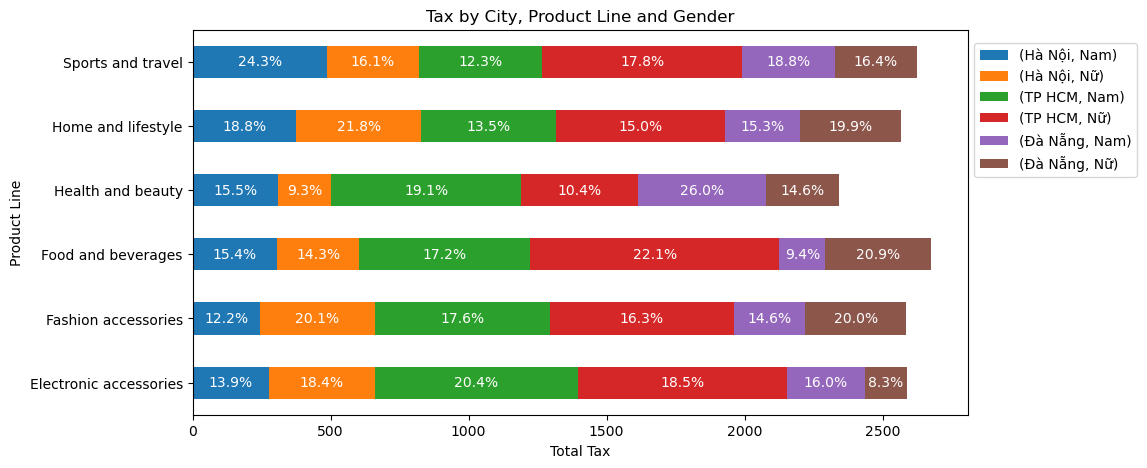

In [178]:
ax = pd.pivot_table(df.groupby([CN_CITY, CN_PROD_LINE, CN_GN], as_index=False)[CN_TAX].sum(), values=CN_TAX, index=[CN_PROD_LINE], columns=[CN_CITY, CN_GN], aggfunc='sum').plot(kind='barh', stacked=True, figsize=(10, 5))
plt.title(f'Tax by {CN_CITY.title()}, {CN_PROD_LINE.title()} and {CN_GN.title()}')
plt.xlabel('Total Tax')
plt.ylabel(CN_PROD_LINE.title())
for c in ax.containers:
    for i, child in enumerate(c.get_children()):
        w = child.get_width()
        h = child.get_height()
        ax.text(child.get_x() + w / 2, child.get_y() + h / 2, f'{w / sum(c.datavalues) * 100:.1f}%', ha='center', va='center', color='white')
ax.legend(loc='lower left', bbox_to_anchor=(1, 0.6))
plt.show()

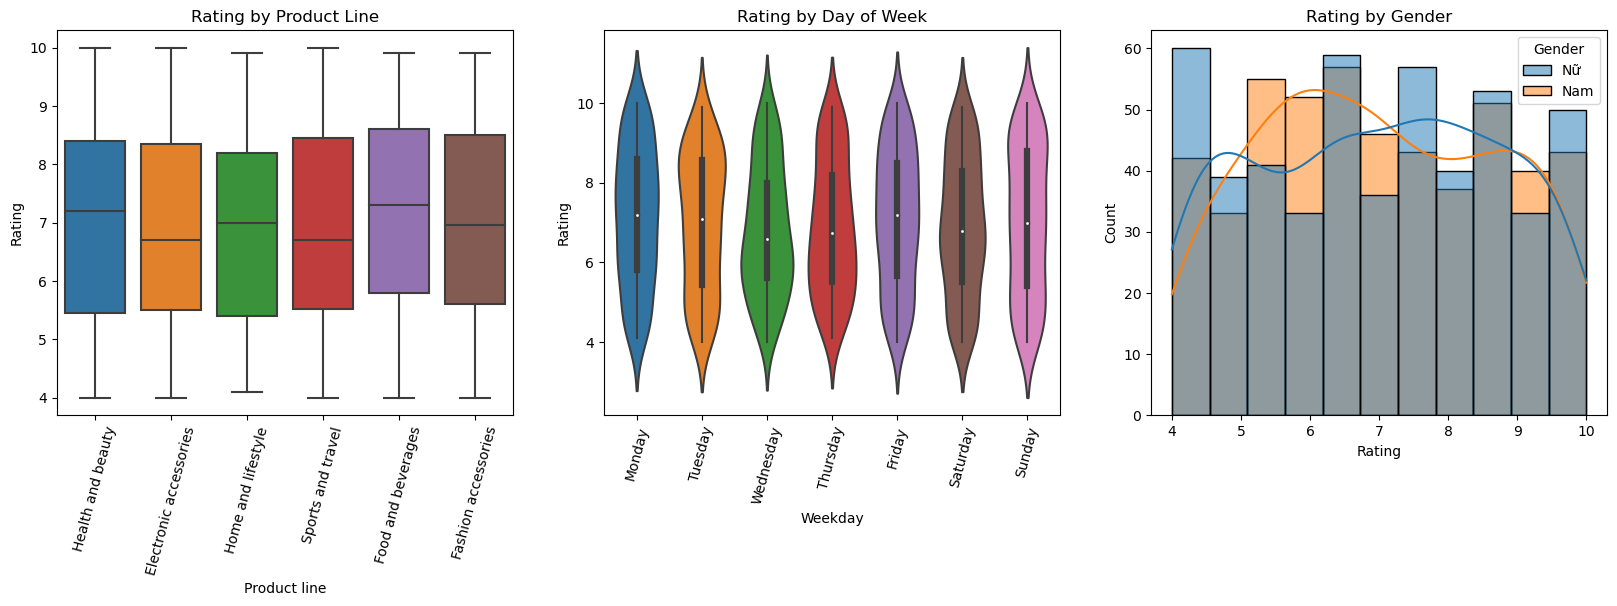

In [253]:
fig, axes = plt.subplots(ncols=3, figsize=(20, 5))

sns.boxplot(x=CN_PROD_LINE, y=CN_RTG, data=df, ax=axes[0])
axes[0].set_title(f'{CN_RTG.title()} by {CN_PROD_LINE.title()}')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=75)

sns.violinplot(x='Weekday', y=CN_RTG, data=df, ax=axes[1])
axes[1].set_title(f'{CN_RTG.title()} by Day of Week')
axes[1].set_xticks(range(7), [datetime.date(1900, 1, 1).strftime('%A'),
                              datetime.date(1900, 1, 2).strftime('%A'),
                              datetime.date(1900, 1, 3).strftime('%A'),
                              datetime.date(1900, 1, 4).strftime('%A'),
                              datetime.date(1900, 1, 5).strftime('%A'),
                              datetime.date(1900, 1, 6).strftime('%A'),
                              datetime.date(1900, 1, 7).strftime('%A')])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=75)

sns.histplot(data=df, x=CN_RTG, hue=CN_GN, kde=True, ax=axes[2])
axes[2].set_title(f'{CN_RTG.title()} by {CN_GN.title()}')

plt.show()

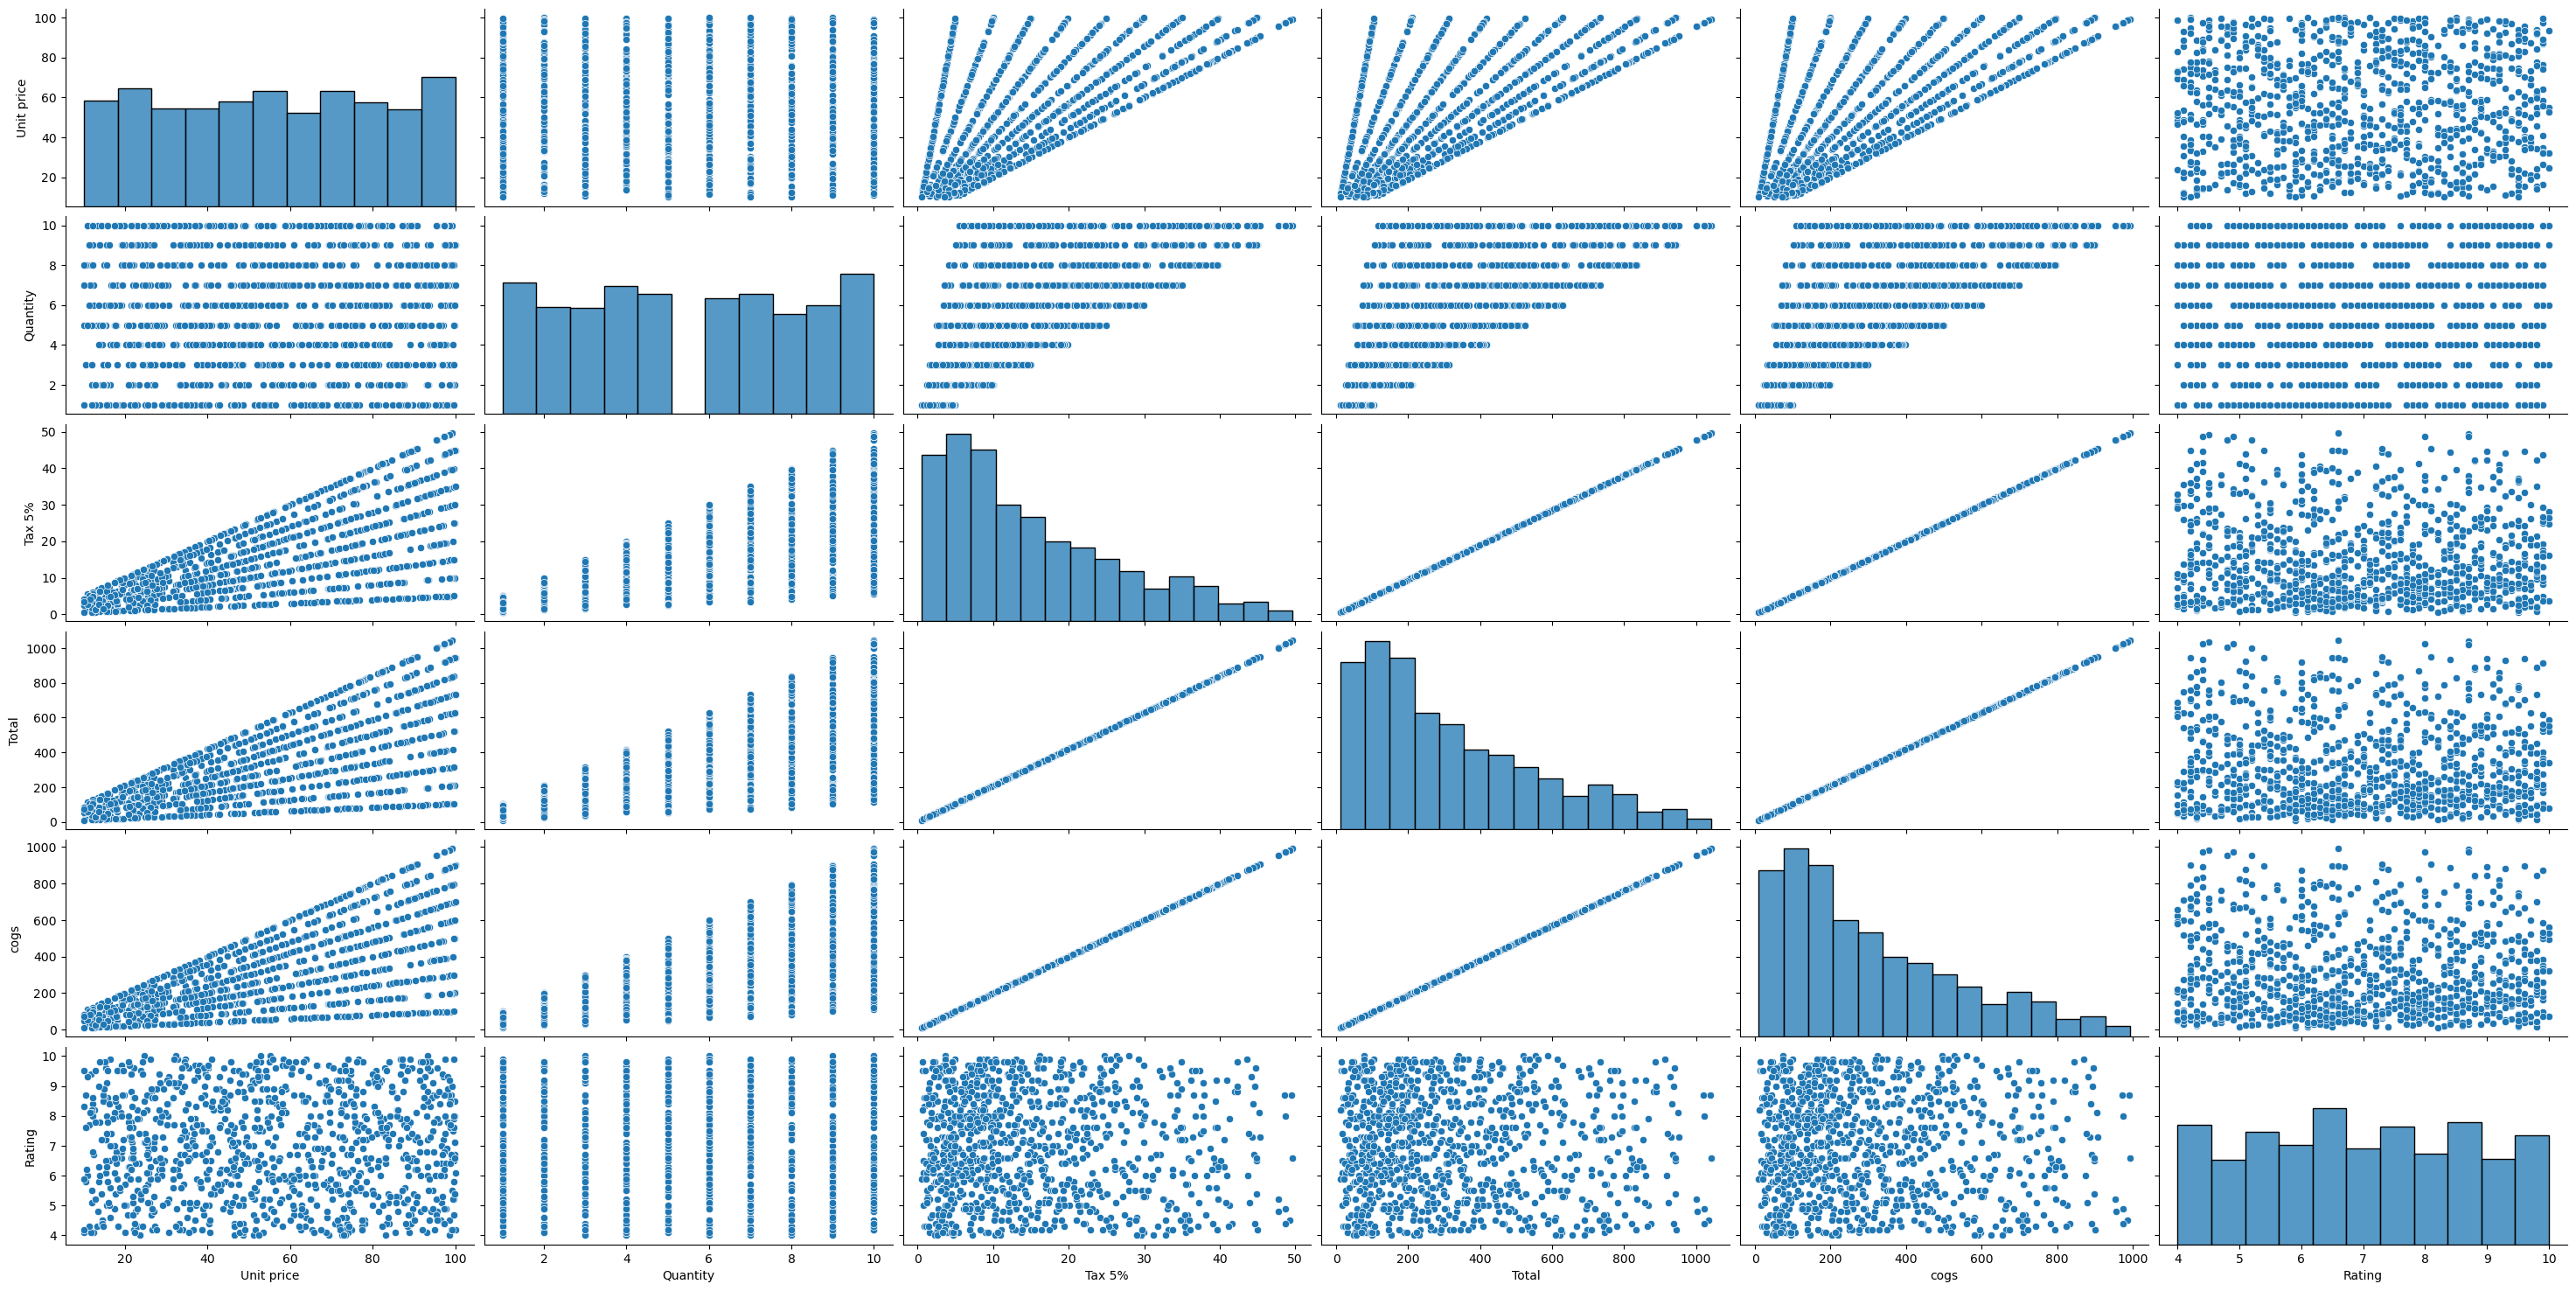

In [187]:
sns.pairplot(df[[CN_UNIT_PR, CN_QTY, CN_TAX, CN_TOT, CN_COGS, CN_RTG]], aspect=2)
plt.show()